In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [3]:
# Load the dataset
df = pd.read_csv("Zoo.csv")

In [4]:
# Check dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None


In [5]:
# Check for missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


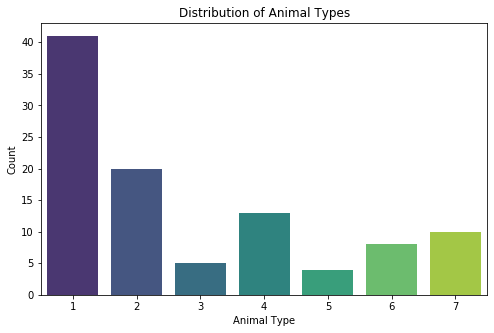

In [6]:
# Visualize class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=df['type'], palette='viridis')
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.title("Distribution of Animal Types")
plt.show()

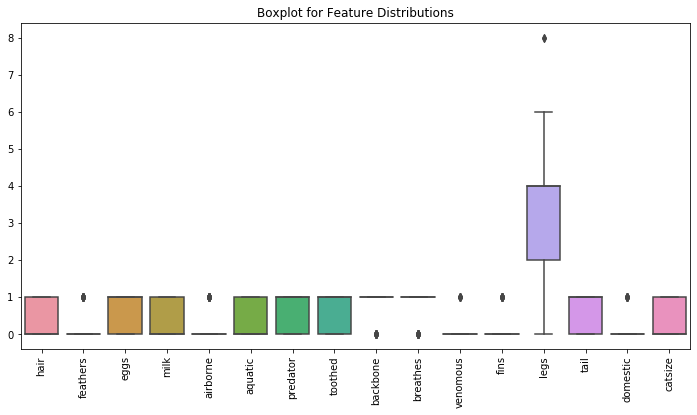

In [7]:
# Boxplot for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.drop(columns=["animal name", "type"]))
plt.xticks(rotation=90)
plt.title("Boxplot for Feature Distributions")
plt.show()

In [8]:
# Drop the 'animal name' column since it's not useful for classification
df.drop(columns=['animal name'], inplace=True)

# Handle outlier in 'legs' column
df['legs'] = df['legs'].replace(5, 4)

In [11]:
# Define features (X) and target (y)
X = df.drop(columns=['type'])  # Features
y = df['type']  # Target

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for distance-based models)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# Train KNN model with k=3
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)


In [13]:
# Try different values of K
k_values = range(1, 21)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, y_train)
    accuracy_scores.append(accuracy_score(y_test, knn.predict(X_test)))


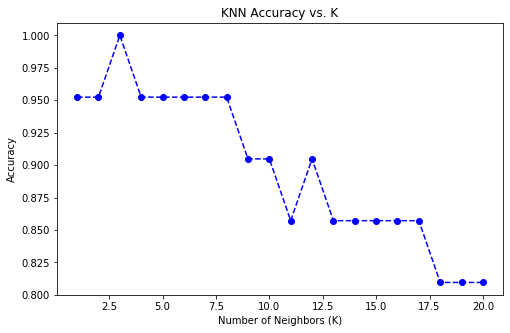

In [14]:
# Plot accuracy vs. K
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='dashed', color='b')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. K")
plt.show()

In [15]:
# Choose the best K (highest accuracy)
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best K: {best_k}")

Best K: 3


In [16]:
# Compute classification metrics
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[12  0  0  0  0  0]
 [ 0  2  0  0  0  0]
 [ 0  0  1  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  0  1]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



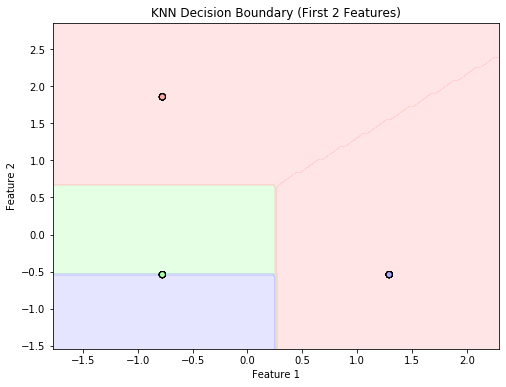

In [17]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    # Only take two features for visualization
    X_plot = X[:, :2]

    # Create meshgrid
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))

    # Predict on grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, edgecolors='k', cmap=cmap)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(title)
    plt.show()

# Train the model using only the first two features for visualization
knn_viz = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_viz.fit(X_train[:, :2], y_train)

# Plot decision boundary
plot_decision_boundary(X_train, y_train, knn_viz, title="KNN Decision Boundary (First 2 Features)")


# What are the key hyperparameters in KNN?

K (Number of Neighbors): Controls how many neighbors vote for classification.

Distance Metric: Defines how similarity is measured (Euclidean, Manhattan, etc.).

Weighting Scheme: Uniform (all neighbors have equal weight) or Distance-based (closer neighbors get more weight).

# What distance metrics can be used in KNN?

K-Nearest Neighbors (KNN) relies on distance metrics to measure the similarity between data points. The most commonly used ones are:

Distance Metric	Best For

Euclidean	Continuous numerical data

Manhattan	High-dimensional or grid-like data

Minkowski	When you need flexibility (choosing P)

Hamming	Categorical (binary) data

Cosine	Text data or high-dimensional vectors
